In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=sns.load_dataset('titanic')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
pd.set_option('display.max_columns', None)
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


생존자와 사망자의 인원을 먼저 구하고,
생존자 인원 수와, 사망자 수
생존 여부 파이그래프 그리기

생존자 사례수 (0: 사망자, 1:생존자)

In [7]:
print(df.survived.value_counts())
print(df.alive.value_counts())

survived
0    549
1    342
Name: count, dtype: int64
alive
no     549
yes    342
Name: count, dtype: int64


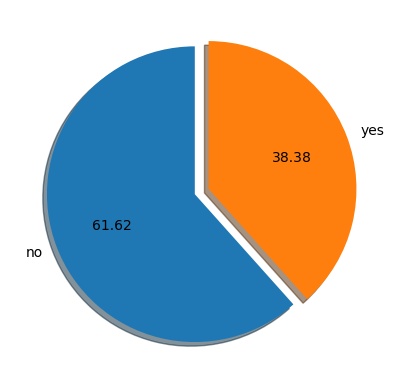

In [8]:
plt.pie(df.alive.value_counts(), labels=['no', 'yes'], explode=(0,0.1), startangle=90, shadow=True, autopct='%.2f') 
#explode 떨어짐 정도 , tartangle 엥글각도, shadow 그림자, autopct='%.1f' 소수점 1자리 값 표시 '%.2f'는 2자리
plt.show()

승선 성별비율

sex
male      577
female    314
Name: count, dtype: int64


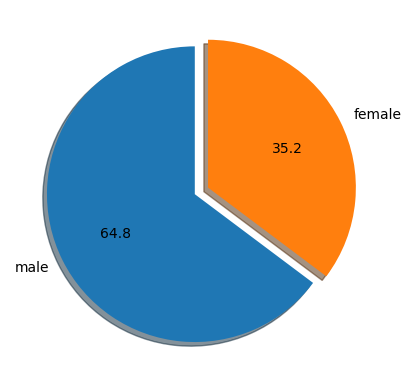

In [9]:
print(df['sex'].value_counts())
plt.pie(df.sex.value_counts(), labels=['male','female'], explode=(0, 0.1), 
        startangle=90, shadow=True, autopct='%.1f')
plt.show()

who
man      537
woman    271
child     83
Name: count, dtype: int64


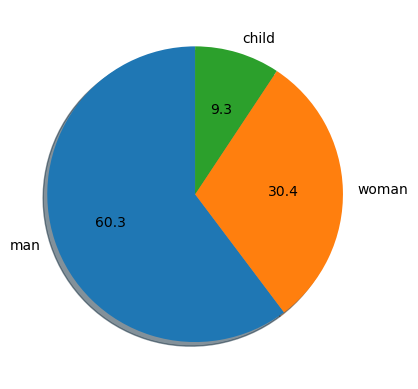

In [10]:
print(df['who'].value_counts())
plt.pie(df.who.value_counts(), labels=['man','woman','child'],  
        startangle=90, shadow=True, autopct='%.1f')
plt.show()

In [11]:
print(df['embark_town'].value_counts())


embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


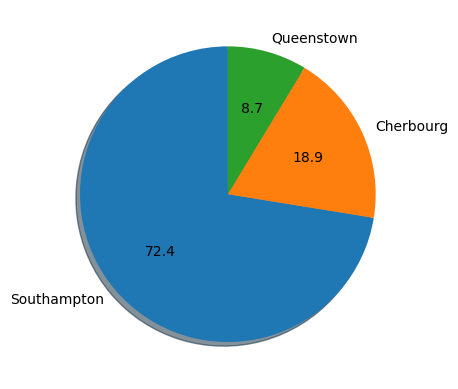

In [12]:
print(df['embark_town'].value_counts())
plt.pie(df.embark_town.value_counts(), labels=['Southampton','Cherbourg','Queenstown'],  
        startangle=90, shadow=True, autopct='%.1f')
plt.show()

객실의 등급수

class
Third     491
First     216
Second    184
Name: count, dtype: int64


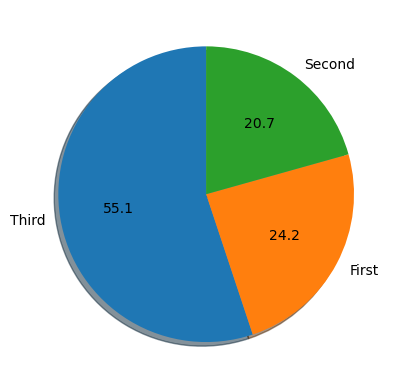

In [13]:
print(df['class'].value_counts())
plt.pie(df['class'].value_counts(), labels=['Third','First','Second'],  #class가 예약어라서 바로 못써
        startangle=90, shadow=True, autopct='%.1f')
plt.show()

많은 수로 → 돌아, 많은→ 그다음 많은 → 그다음 이 순서로 파이에서 배열

나이분포, 요금분포는 히스토그램으로 하자

alone
True     537
False    354
Name: count, dtype: int64


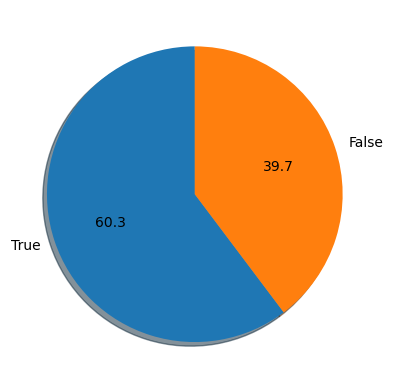

In [14]:
print(df['alone'].value_counts())
plt.pie(df.alone.value_counts(), labels=['True','False'],  
        startangle=90, shadow=True, autopct='%.1f')
plt.show()

히스토그램 그려보자.
파이는 값이 딱 정해진거, 연속그래프는 히스토그램이 낫다. 나이같은거

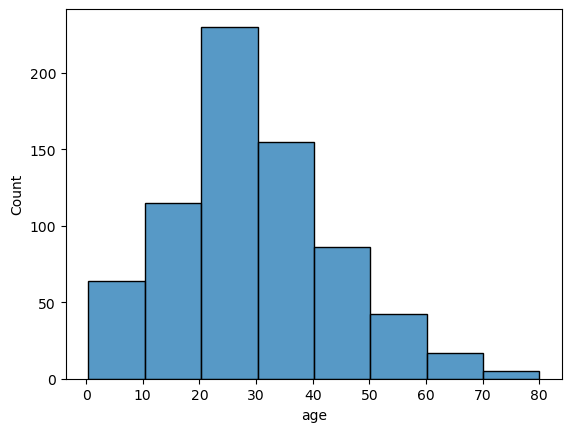

In [15]:
sns.histplot(df, x='age', bins=8)
plt.show()

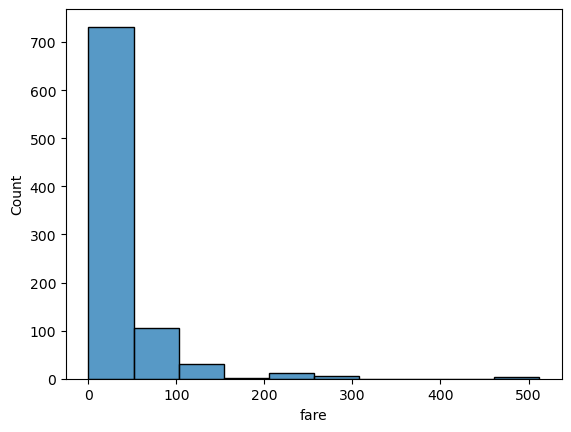

In [16]:
sns.histplot(df, x='fare', bins=10)
plt.show()

분석 전에 데이터를 받으면, 이렇게 전체를 한번씩 확인해야해.
이제 데이터간의 관계들을 확인해보자.
생존자-성별의 관계
countplot은 x값만 있으면 돼. 남자 여자 카운팅만해줘

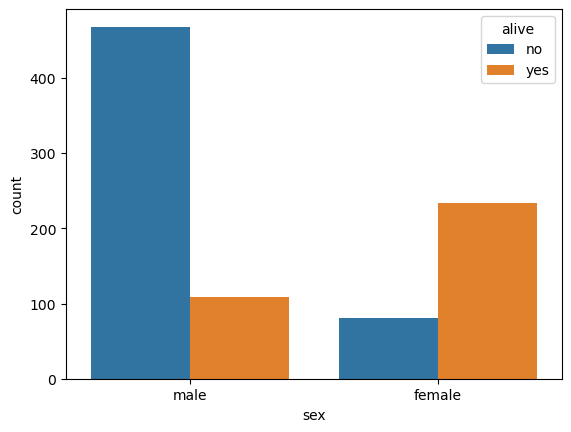

In [17]:
# sns.countplot(data=df, x=df['sex'], hue=df['alive'])
sns.countplot(data=df, x='sex', hue='alive') #df를 data로 넣어줘서, 컬럼을 인지 잘함.
plt.show()

성별에 따라서

In [18]:
pd.crosstab(df['sex'], df['alive'], margins=True)

alive,no,yes,All
sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


등급에 따라서

alive    no  yes  All
class                
First    80  136  216
Second   97   87  184
Third   372  119  491
All     549  342  891


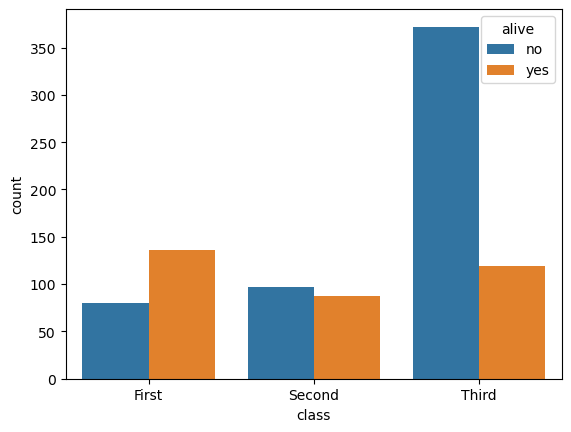

In [23]:
print(pd.crosstab(df['class'], df['alive'], margins=True))
sns.countplot(df, x='class', hue='alive')
plt.show()

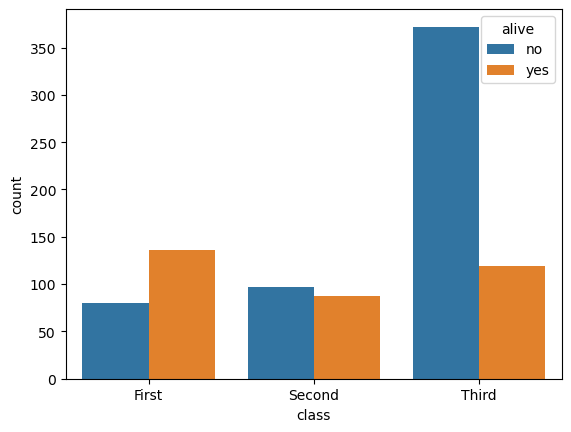

In [21]:
# sns.countplot(data=df, x=df['class'], hue=df['alive'])
sns.countplot(data=df, x='class', hue='alive') #df를 data로 넣어줘서, 컬럼을 인지 잘함.
plt.show()

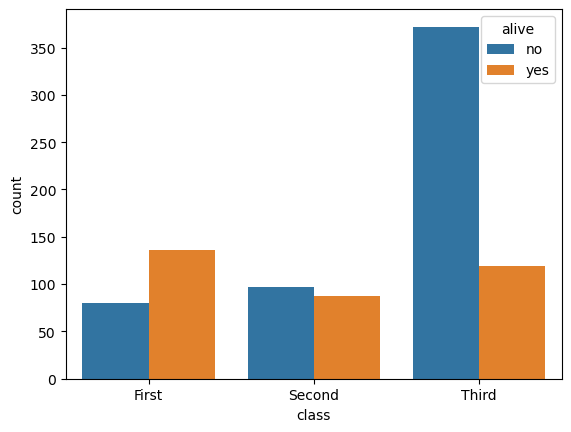

In [24]:
sns.countplot(data=df, x='class', hue='alive')
plt.show()

In [27]:
print(pd.crosstab(df['class'], df['alive'], margins=True))

alive    no  yes  All
class                
First    80  136  216
Second   97   87  184
Third   372  119  491
All     549  342  891


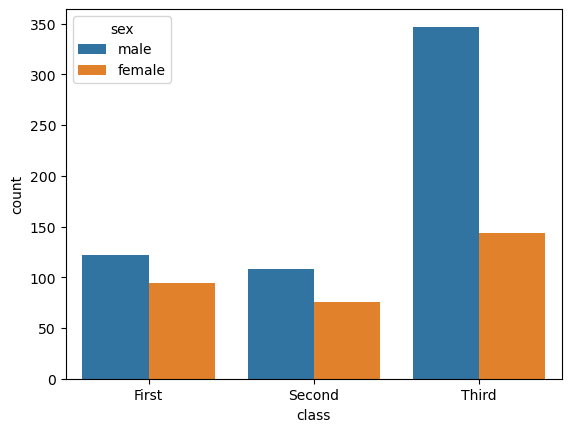

In [28]:
sns.countplot(data=df, x='class', hue='sex')
plt.show()

In [29]:
print(pd.crosstab(df['alive'], [df['class'], df['sex']],margins=True))

class  First      Second       Third       All
sex   female male female male female male     
alive                                         
no         3   77      6   91     72  300  549
yes       91   45     70   17     72   47  342
All       94  122     76  108    144  347  891


sns에 카테고리 플롯

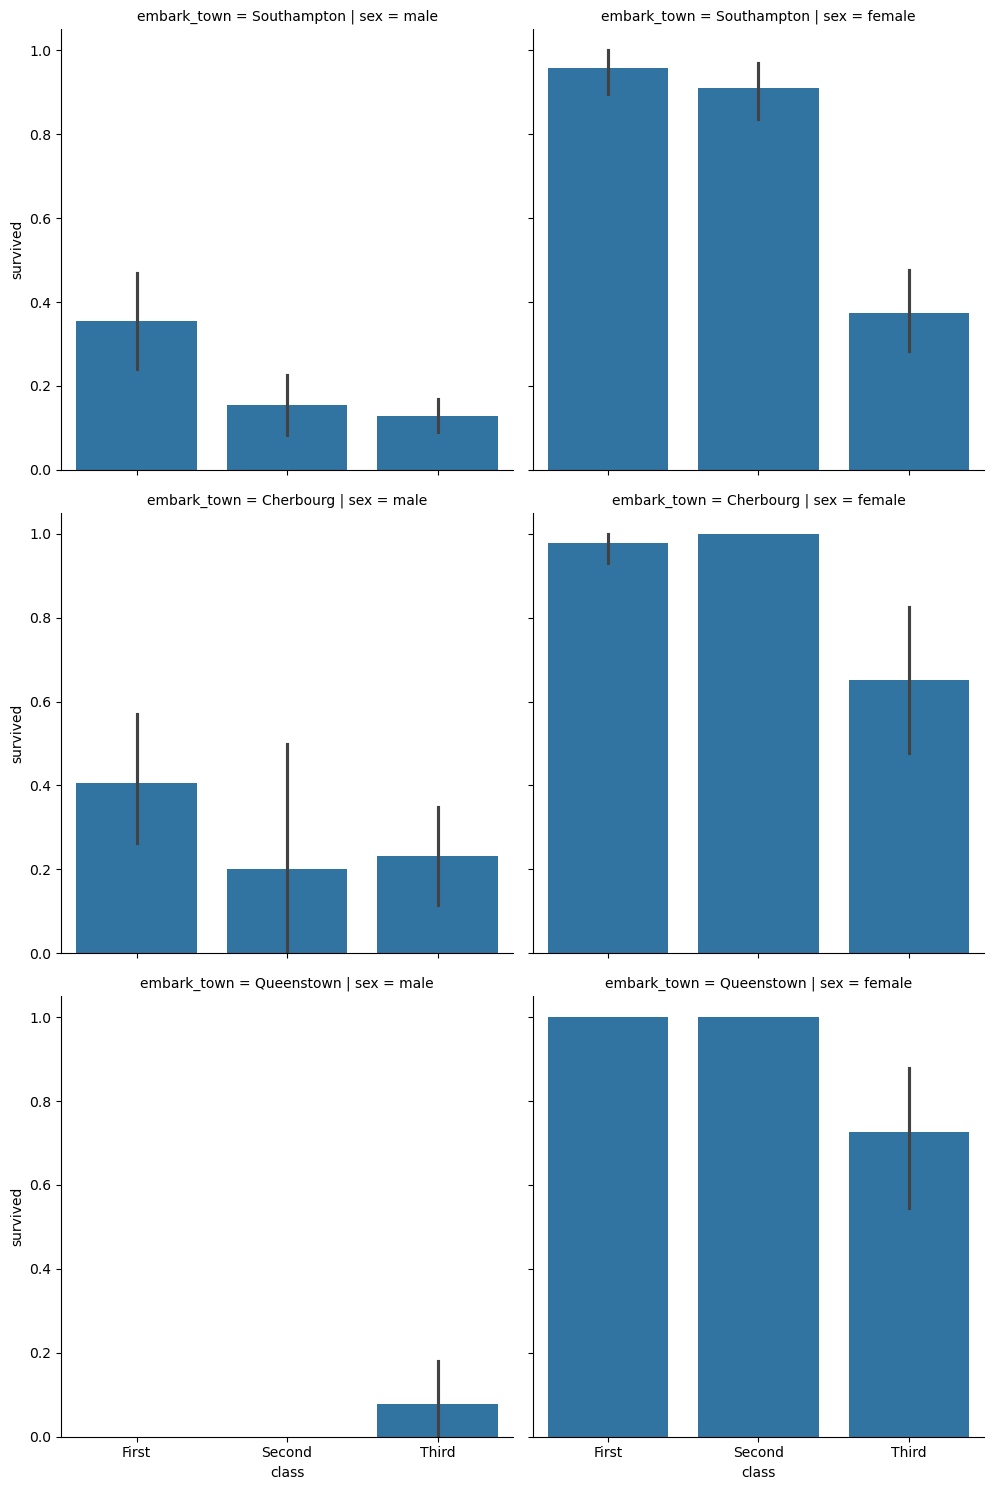

In [31]:
sns.catplot(x='class', y='survived', col='sex', row='embark_town', data=df, kind='bar') #data를 df 했기때문에 컬럼명만
plt.show()


변수 하나 만들고 시작

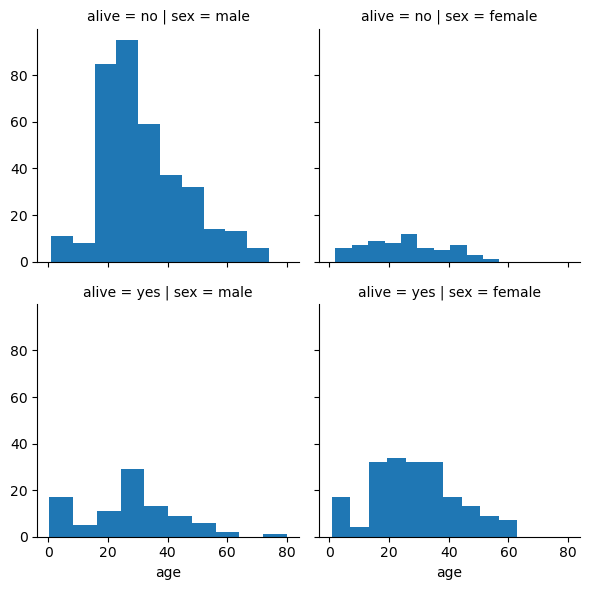

In [ ]:
g=sns.FacetGrid(df, col='sex')
g.map(plt.hist,'age')
plt.show()

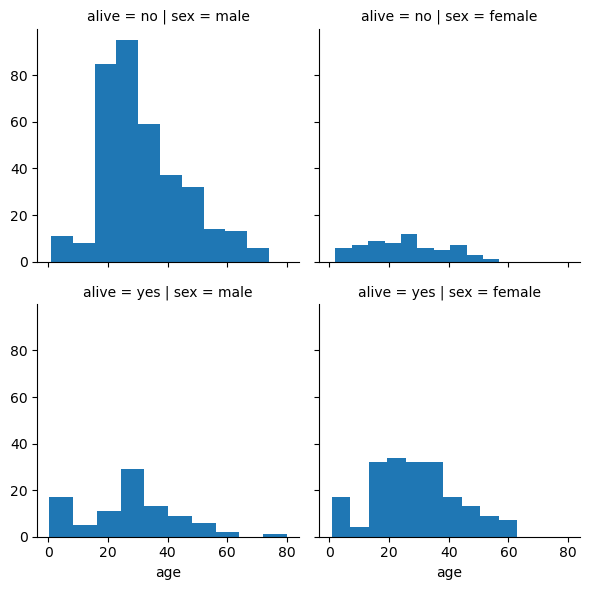

In [34]:
g=sns.FacetGrid(df, col='sex', row='alive')
g.map(plt.hist,'age')
plt.show()

등급에 따라도 고쳐보자

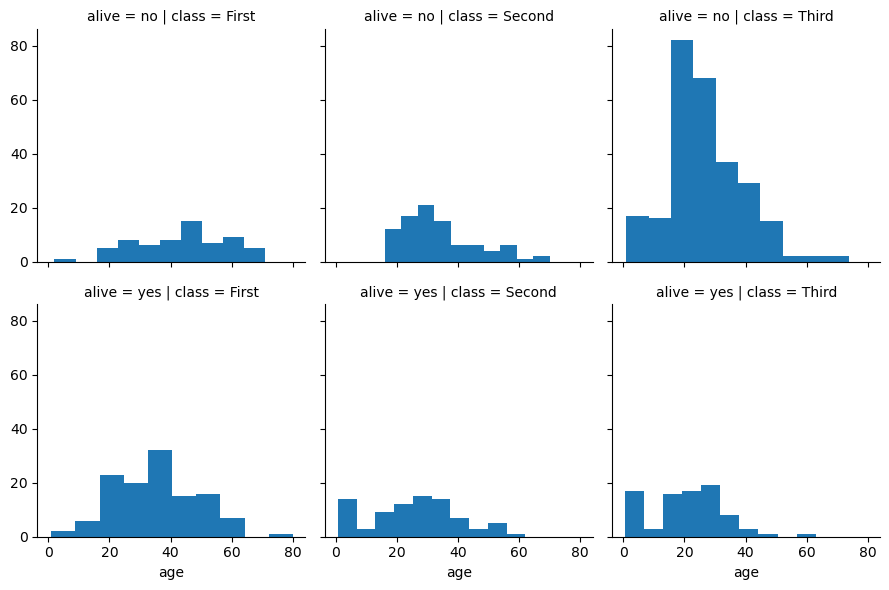

In [35]:
g=sns.FacetGrid(df, col='class', row='alive')
g.map(plt.hist,'age')
plt.show()

탑승도시 별 생존자수와 생존률 - 성별

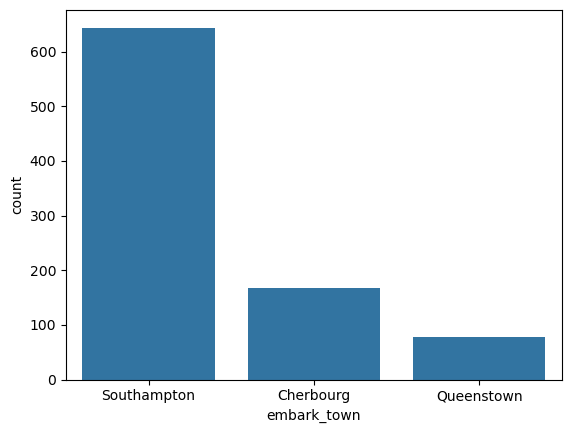

In [37]:
sns.countplot(data=df, x='embark_town')
plt.show()

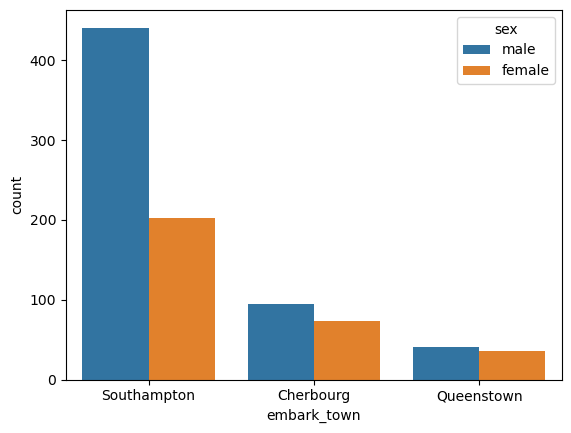

In [36]:
sns.countplot(data=df, x='embark_town', hue='sex')
plt.show()

In [39]:
print(pd.crosstab(df['embark_town'], [df['class'], df['sex']],margins=True))

class        First      Second       Third       All
sex         female male female male female male     
embark_town                                         
Cherbourg       43   42      7   10     23   43  168
Queenstown       1    1      2    1     33   39   77
Southampton     48   79     67   97     88  265  644
All             92  122     76  108    144  347  889


In [40]:
pd.crosstab(df['embark_town'], [df['class'], df['sex']],margins=True)

class        First      Second       Third       All
sex         female male female male female male     
embark_town                                         
Cherbourg       43   42      7   10     23   43  168
Queenstown       1    1      2    1     33   39   77
Southampton     48   79     67   97     88  265  644
All             92  122     76  108    144  347  889

데이터를 먼저 파악하고 나서 분석해야해!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!